<a href="https://colab.research.google.com/github/noahnguyen2004/Newton-s-Method-for-MLE/blob/main/Newton's_Method_for_MLE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [92]:
def newton_mle_poisson(v, y, theta, max_iters = 1000, epsilon = 1 * (10 ** (-10))):
  '''
    find MLE for censored Poisson models given data (v, y)
    using Newton's method
  '''
  new_theta = theta
  i = 0
  convergence = False
  theta_values = []

  while (i < max_iters and not convergence):
    theta = new_theta
    print(theta)
    u = np.exp(-theta * v)
    first_deriv = np.sum((y * v * u) / (1 - u) - (1 - y) * v)
    second_deriv = np.sum((y * (v ** 2) * u) / ((1 - u) ** 2))

    new_theta = theta - first_deriv / second_deriv
    convergence = np.abs(new_theta - theta) < epsilon
    theta_values.append(new_theta)
    i = i + 1
  return theta, theta_values

In [53]:
# def newton_mle_poisson(v, y, theta, max_iters = 1000, epsilon = 1 * (10 ** (-10))):
#   '''
#       find MLE for censored Poisson models given data (v, y)
#       using Newton's method
#   '''
#   new_theta = theta
#   i = 0
#   convergence = False
#   theta_values = []


#   # while (i < max_iters and not convergence):
#   #   for i in range(len(v)):
#   #     theta = new_theta
#   #     u = np.exp(-theta * v[i])
#   #     first_deriv = sum((y * v[i] * u) / (1 - u))

#   # for i in range(len(v)):
#   #   ...

#   # for i in range(len(y)):
#   #   ...

#   while (i < max_iters and not convergence):
#     theta = new_theta
#     print(theta)                                                  # take a look at theta at each iteration
#     u = np.exp(-theta * v)
#     first_deriv = np.sum((y * v * u) / (1 - u) - (1 - y) * v)
#     second_deriv = np.sum((y * (v ** 2) * u) / ((1 - u) ** 2))
#     new_theta = theta - (first_deriv) / (second_deriv)            # update theta
#     convergence = np.abs(new_theta - theta) < epsilon
#     theta_values.append(new_theta)
#     i = i + 1
#   return theta, theta_values

In [93]:
def log_likelihood_poisson(theta, v, y):
  '''
    Compute log likelihood
  '''
  log_likelihood_lst = []
  for i in range(len(v)):
    u = math.exp(-theta * v)
    log_likelihood_lst[i] = sum(y * np.log10(1 - u) + (1 - y) * (-theta * v))
  log_likelihood = sum(log_likelihood_lst)
  return log_likelihood

In [ ]:
# initialize some v and y
v = np.array([8,8,8,8,8,8,8,8,8,8,
              4,4,4,4,4,4,4,4,4,4,
              2,2,2,2,2,2,2,2,2,2,
              1,1,1,1,1,1,1,1,1,1])


# v =           [8,8,8,8,8,8,8,8,8,8,
#               4,4,4,4,4,4,4,4,4,4,
#               2,2,2,2,2,2,2,2,2,2,
#               1,1,1,1,1,1,1,1,1,1]

# y =           [1,1,1,1,1,1,1,1,1,1,
#               1,1,1,1,1,1,1,1,0,0,
#               1,1,1,1,1,1,1,0,0,0,
#               1,1,1,0,0,0,0,0,0,0]

y = np.array([1,1,1,1,1,1,1,1,1,1,
              1,1,1,1,1,1,1,1,0,0,
              1,1,1,1,1,1,1,0,0,0,
              1,1,1,0,0,0,0,0,0,0])

init_theta = 0.1
theta, theta_values = newton_mle_poisson(v, y, init_theta, 1000, 1.0 * (10 ** (-10)))



print(len(theta_values))
# run function to find theta_mle and the list of each theta and see how it behaves


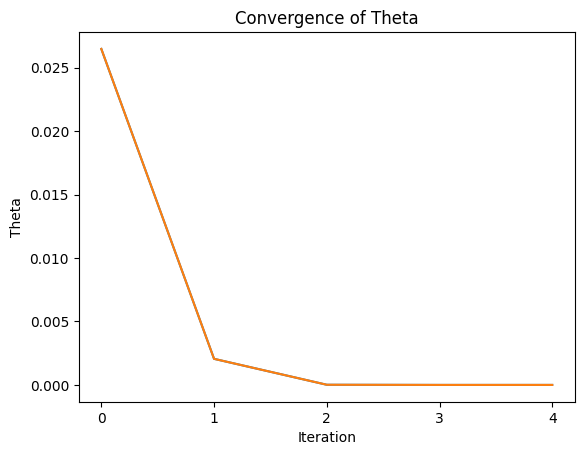

In [95]:
fig, ax = plt.subplots()

# Example data
ax.plot(theta_values)

# Manually set x and y ticks
ax.set_xticks(range(0, 5, 1))  # Set x-axis ticks with a step of 1
# ax.set_yticks(range(0, 31, 5))  # Set y-axis ticks with a step of 5

plt.plot(theta_values)
plt.xlabel('Iteration')
plt.ylabel('Theta')
plt.title('Convergence of Theta')
plt.show()

After 2 iterations, the error between the updated theta and the current theta is less than the error bound (epsilon). We return the theta value at that iteration.